In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_DIR = Path('../data')
filepath = DATA_DIR / 'train.csv'
file_test = DATA_DIR / 'test.csv'

target_column = 'SalePrice'

### Read dataset csv file

In [3]:
df_master = pd.read_csv(filepath, index_col='Id')
df_master.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_test = pd.read_csv(file_test, index_col='Id')
data_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Preprocessing

In [5]:
df = df_master.copy().drop(target_column, axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
y = df_master[target_column]
y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

### Data test

In [7]:
test_df = data_test.copy()
test_df.index -= 1460
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
4,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
5,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
data_test_id = data_test.index
data_test_id

Int64Index([1461, 1462, 1463, 1464, 1465, 1466, 1467, 1468, 1469, 1470,
            ...
            2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918, 2919],
           dtype='int64', name='Id', length=1459)

## Impute missing data

In [9]:
import sys
sys.path.append('..')
from app.preprocessing import *

In [10]:
preprocessed_df = preprocess(df)
preprocessed_df.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
809,80,RL,85.0,13400,Pave,Missing Value,Reg,Lvl,AllPub,Inside,...,0,0,Missing Value,GdWo,Missing Value,0,6,2006,WD,Normal
1117,80,RL,0.0,7750,Pave,Missing Value,Reg,Lvl,AllPub,Inside,...,0,0,Missing Value,Missing Value,Missing Value,0,3,2009,WD,Normal
109,50,RM,85.0,8500,Pave,Missing Value,Reg,Lvl,AllPub,Corner,...,0,0,Missing Value,Missing Value,Missing Value,0,8,2007,WD,Normal
336,190,RL,0.0,164660,Grvl,Missing Value,IR1,HLS,AllPub,Corner,...,0,0,Missing Value,Missing Value,Shed,700,8,2008,WD,Normal
814,20,RL,75.0,9750,Pave,Missing Value,Reg,Lvl,AllPub,Inside,...,0,0,Missing Value,Missing Value,Shed,500,4,2007,COD,Normal


## Feature Engineering

### OneHotEncoder

In [11]:
from app.feature_engineering import *

In [12]:
# save OneHotEncoder
save_one_encoder(preprocessed_df)

In [14]:
X = feature_engineer(preprocessed_df)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,258,259,260,261,262,263,264,265,266,267
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Training data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
X_train.shape, y_train.shape

((1168, 304), (1168,))

### RandomForestClassifier

In [17]:
 from sklearn.ensemble import RandomForestRegressor

In [18]:
reg = RandomForestRegressor(max_depth=10, random_state=0)

In [19]:
reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

## Evaluation

In [20]:
from sklearn.metrics import mean_squared_log_error

def compute_rmsle(y_test: np.array, y_pred:np.array, precision: int = 2) -> float:
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    return round(rmsle, precision)

In [21]:
reg.score(X_train, y_train)

0.9739797668233358

## Save Model

In [22]:
import pickle

In [23]:
filename = '../data/predcition_house.sav'
pickle.dump(reg, open(filename, 'wb'))

## Prediction

In [24]:
# load model
housing_model = pickle.load(open(filename, 'rb'))

In [25]:
housing_model.score(X_train, y_train)

0.9739797668233358

In [26]:
y_pred = housing_model.predict(X_test)

In [27]:
compute_rmsle(y_test, y_pred)

0.15

In [28]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
4,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
5,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [29]:
preprocessed_test = preprocess(test_df)

In [30]:
encoded_categorical_test_df = encode_categorical_data(preprocessed_test)
encoded_categorical_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,258,259,260,261,262,263,264,265,266,267
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
encoded_test = feature_engineer(preprocessed_test)
encoded_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,258,259,260,261,262,263,264,265,266,267
1,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
preditions = housing_model.predict(encoded_test)
preditions

array([124393.06328153, 155844.14221477, 180663.30623834, ...,
       154844.34244318, 117697.67639914, 222073.22368078])

# Write output

In [33]:
from app.output import *

In [34]:
make_output(data_test_id, preditions)

# Submission

In [35]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f ../data/submission.csv -m "Try with new max depth"


  0%|          | 0.00/35.1k [00:00<?, ?B/s]
100%|██████████| 35.1k/35.1k [00:03<00:00, 9.46kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques


In [37]:
!kaggle competitions submissions -c house-prices-advanced-regression-techniques

fileName               date                 description             status    publicScore  privateScore  
---------------------  -------------------  ----------------------  --------  -----------  ------------  
submission.csv         2021-05-07 20:33:57  Try with new max depth  complete  0.15365      None          
submission.csv         2021-05-07 20:33:23  Try with new max depth  complete  0.15158      None          
submission.csv         2021-05-07 20:32:36  Try with new max depth  complete  0.15791      None          
submission.csv         2021-05-07 20:30:08  Try with new max depth  complete  0.15046      None          
submission.csv         2021-05-07 20:29:46  Try with new max depth  complete  0.15153      None          
submission.csv         2021-05-07 20:28:10  Try with new max depth  complete  0.25835      None          
submission.csv         2021-05-07 20:26:37  Try with new max depth  complete  0.34104      None          
submission.csv         2021-05-07 20:26:06  Tr

In [41]:
import matplotlib.pyplot as plt

(array([ 16.,  74., 184., 345., 252., 199., 125.,  85.,  61.,  38.,  27.,
         15.,  14.,   8.,   6.,   2.,   1.,   1.,   2.,   1.,   2.,   0.,
          0.,   0.,   2.]),
 array([ 34900.,  63704.,  92508., 121312., 150116., 178920., 207724.,
        236528., 265332., 294136., 322940., 351744., 380548., 409352.,
        438156., 466960., 495764., 524568., 553372., 582176., 610980.,
        639784., 668588., 697392., 726196., 755000.]),
 <BarContainer object of 25 artists>)

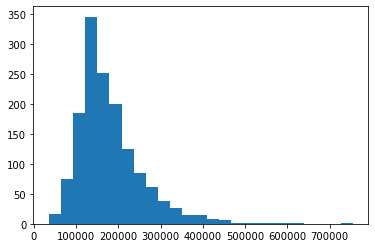

In [61]:
plt.hist(y, bins=25)